**DATA PREPARETION**

1. Read Data

In [ ]:
import pandas as pd

file_path = 'scraping_tiktok.csv'

try:
    # Membaca csv dengan opsi error_bad_lines=False untuk skip baris error (deprecated di versi terbaru, gunakan on_bad_lines='skip')
    df = pd.read_csv(file_path, on_bad_lines='skip')

    # Menampilkan info dataset
    print(df.info())

    # Menampilkan 5 baris pertama
    print(df.head())

except Exception as e:
    print(f"Terjadi error saat membaca file: {e}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1747 entries, 0 to 1746
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                        Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                                                                                                                                                                                                                                        --------------  ----- 
 0   id,"V

In [ ]:
print(df.shape)  # jumlah baris dan kolom


(1747, 1)


In [ ]:
print(df.dtypes)


id,"Video Description","Video Create Time","Video Category Type","Video Duration","Video Width","Video Height","Video URL","Video Cover","Video View Count","Video Like Count","Video Comment Count","Video Share Count","Author ID","Author Nickname","Author Username","Author Avatar","Author Bio","Author Verified","Music ID","Music Title","Music Author","Music Cover","Music URL","Music Duration","Video Page URL";    object
dtype: object


In [ ]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col}: {df[col].unique()[:5]}")


id,"Video Description","Video Create Time","Video Category Type","Video Duration","Video Width","Video Height","Video URL","Video Cover","Video View Count","Video Like Count","Video Comment Count","Video Share Count","Author ID","Author Nickname","Author Username","Author Avatar","Author Bio","Author Verified","Music ID","Music Title","Music Author","Music Cover","Music URL","Music Duration","Video Page URL";: ['7498257602137148680,"( Robbi Kholaq ) Habib Abdullah Bin Ali Alathas  #habibabdullahbinalialatthos #pencintahabibabdullahbinalialatthos #sholawatnabi #sholawat #sholawatan_yuk #fypsholawat #fyp ",1745824149,120,"125","576","1024","https://v16-webapp-prime.tiktok.com/video/tos/alisg/tos-alisg-pve-0037c001/o8FicK2oDAG3Be7QEviykRKBUuPfEJtVEPogID/?a=1988&bti=ODszNWYuMDE6&ch=0&cr=3&dr=0&lr=all&cd=0%7C0%7C0%7C&cv=1&br=1348&bt=674&cs=0&ds=6&ft=4fUEKMO_8Zmo0_RBAI4jVZTb-pWrKsd.&mime_type=video_mp4&qs=0&rc=aDc5OGc1OmQ2Ozw5OjxnNEBpM3h1dnE5cmhsMzMzODczNEBeL2FjMTMvNWMxMGJfXy0yYSNoa15nMmRzZT

**Data Cleaning**

In [ ]:
# Missing Values

print("📝 Missing Values per Column:")
print(df.isnull().sum())


📝 Missing Values per Column:
id,"Video Description","Video Create Time","Video Category Type","Video Duration","Video Width","Video Height","Video URL","Video Cover","Video View Count","Video Like Count","Video Comment Count","Video Share Count","Author ID","Author Nickname","Author Username","Author Avatar","Author Bio","Author Verified","Music ID","Music Title","Music Author","Music Cover","Music URL","Music Duration","Video Page URL";    0
dtype: int64


In [ ]:
df = df.drop_duplicates()


Jika hasil di atas menunjukkan hanya 1 kolom besar

In [ ]:
if len(df.columns) == 1:
    print("\n⚠️ Detected only 1 column. Retrying with delimiter=';' ...")
    df = pd.read_csv(file_path, delimiter=';', encoding='utf-8')

    # Cek ulang kolom
    print("\n📝 Columns detected after retrying:")
    print(df.columns)
    print("\n🔍 Head of data:")
    print(df.head())


⚠️ Detected only 1 column. Retrying with delimiter=';' ...

📝 Columns detected after retrying:
Index(['id,"Video Description","Video Create Time","Video Category Type","Video Duration","Video Width","Video Height","Video URL","Video Cover","Video View Count","Video Like Count","Video Comment Count","Video Share Count","Author ID","Author Nickname","Author Username","Author Avatar","Author Bio","Author Verified","Music ID","Music Title","Music Author","Music Cover","Music URL","Music Duration","Video Page URL"', 'Unnamed: 1'], dtype='object')

🔍 Head of data:
  id,"Video Description","Video Create Time","Video Category Type","Video Duration","Video Width","Video Height","Video URL","Video Cover","Video View Count","Video Like Count","Video Comment Count","Video Share Count","Author ID","Author Nickname","Author Username","Author Avatar","Author Bio","Author Verified","Music ID","Music Title","Music Author","Music Cover","Music URL","Music Duration","Video Page URL"  \
0  74982576021371

**Solusi Fix Reading Method**

In [ ]:
import pandas as pd
import csv

file_path = 'scraping_tiktok.csv'
data = []
header = None

try:
    with open(file_path, 'r', encoding='utf-8') as f:
        # Use csv.reader with a guessed delimiter (semicolon or comma)
        # Trying with semicolon first based on previous output
        reader = csv.reader(f, delimiter=';')

        # Read the header row
        header = next(reader)[0].split(',') # Split the single column header string by comma

        for i, row in enumerate(reader):
            # Join the row elements and split by comma
            processed_row = ','.join(row).split(',')
            if len(processed_row) == len(header):
                data.append(processed_row)
            else:
                # Handle rows with inconsistent number of fields - skip or log
                print(f"Skipping row {i+2} due to inconsistent fields: {row}")
                pass # Or implement more sophisticated error handling

    if header and data:
        df_manual = pd.DataFrame(data, columns=header)
        print("\n📝 Data Dimensions (rows, columns) after manual parsing:")
        print(df_manual.shape)
        print("\n🔍 Head of data after manual parsing:")
        print(df_manual.head())
    else:
        print("⚠️ No data was successfully parsed.")

except Exception as e:
    print(f"Terjadi error saat membaca file atau memproses data secara manual: {e}")

Skipping row 2 due to inconsistent fields: ['7498257602137148680,"( Robbi Kholaq ) Habib Abdullah Bin Ali Alathas  #habibabdullahbinalialatthos #pencintahabibabdullahbinalialatthos #sholawatnabi #sholawat #sholawatan_yuk #fypsholawat #fyp ",1745824149,120,"125","576","1024","https://v16-webapp-prime.tiktok.com/video/tos/alisg/tos-alisg-pve-0037c001/o8FicK2oDAG3Be7QEviykRKBUuPfEJtVEPogID/?a=1988&bti=ODszNWYuMDE6&ch=0&cr=3&dr=0&lr=all&cd=0%7C0%7C0%7C&cv=1&br=1348&bt=674&cs=0&ds=6&ft=4fUEKMO_8Zmo0_RBAI4jVZTb-pWrKsd.&mime_type=video_mp4&qs=0&rc=aDc5OGc1OmQ2Ozw5OjxnNEBpM3h1dnE5cmhsMzMzODczNEBeL2FjMTMvNWMxMGJfXy0yYSNoa15nMmRzZTRhLS1kMTFzcw%3D%3D&btag=e00090000&expire=1752069433&l=202507072155067EF3C40D31CC1340F0E0&ply_type=2&policy=2&signature=991b1a03eefce55a2531c861d4943bd7&tk=tt_chain_token","https://p16-sign-sg.tiktokcdn.com/tos-alisg-p-0037/oo4vz1zAKgVaBAgxUuft8ReYF6fBPAGeL5QAMG~tplv-tiktokx-origin.image?dr=14575&x-expires=1752066000&x-signature=mwzlpk9fa2V2TD25fsPfcAovs0U%3D&t=4d5b0474

In [ ]:
import csv

file_path = 'scraping_tiktok.csv'

with open(file_path, encoding='utf-8') as f:
    reader = csv.reader(f)
    for i, row in enumerate(reader):
        print(f"Row {i} has {len(row)} columns")
        if i < 5:
            print(row)


Row 0 has 1 columns
['id,"Video Description","Video Create Time","Video Category Type","Video Duration","Video Width","Video Height","Video URL","Video Cover","Video View Count","Video Like Count","Video Comment Count","Video Share Count","Author ID","Author Nickname","Author Username","Author Avatar","Author Bio","Author Verified","Music ID","Music Title","Music Author","Music Cover","Music URL","Music Duration","Video Page URL";']
Row 1 has 1 columns
['7498257602137148680,"( Robbi Kholaq ) Habib Abdullah Bin Ali Alathas  #habibabdullahbinalialatthos #pencintahabibabdullahbinalialatthos #sholawatnabi #sholawat #sholawatan_yuk #fypsholawat #fyp ",1745824149,120,"125","576","1024","https://v16-webapp-prime.tiktok.com/video/tos/alisg/tos-alisg-pve-0037c001/o8FicK2oDAG3Be7QEviykRKBUuPfEJtVEPogID/?a=1988&bti=ODszNWYuMDE6&ch=0&cr=3&dr=0&lr=all&cd=0%7C0%7C0%7C&cv=1&br=1348&bt=674&cs=0&ds=6&ft=4fUEKMO_8Zmo0_RBAI4jVZTb-pWrKsd.&mime_type=video_mp4&qs=0&rc=aDc5OGc1OmQ2Ozw5OjxnNEBpM3h1dnE5cmhsMzM

In [23]:
import pandas as pd

file_path = 'scraping_tiktok.csv'

# Use on_bad_lines='skip' instead of deprecated error_bad_lines and warn_bad_lines
df = pd.read_csv(file_path, sep=',', engine='python', on_bad_lines='skip', quoting=1, encoding='utf-8')

print(df.shape)
print(df.head())

(308, 2)
                   Live setiap hari  slasa kamis di bandara;
0                                .;                     None
1       Download Aplikasi RTM KLIK;                     None
2    📍Gading Serpong📍Kelapa Gading;                     None
3                         wasjur 🔥;                     None
4  📩 : indonesiaaklegacy@gmail.com;                     None


**MEMPERBAIKI POLA**

In [24]:
parsed_data = []

with open('scraping_tiktok.csv', encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines:
        line = line.strip()
        if line:  # skip empty lines
            fields = line.split(';')  # ganti dengan ',' jika delimiter koma
            parsed_data.append(fields)

import pandas as pd

df = pd.DataFrame(parsed_data)
print(df.head())
print(df.shape)


                                                   0 1
0  "id,""Video Description"",""Video Create Time"...  
1  "7498257602137148680,""( Robbi Kholaq ) Habib ...  
2  "ig : syi.arsholawat"",""No"",""74982580476057...  
3  "7501103583497063688,""Kapal Pesiar Buang Limb...  
4  "7492779312244854022,""HABIBI ROSUL ALLAH #mid...  
(1762, 2)


In [25]:
import re

data = []

with open('scraping_tiktok.csv', encoding='utf-8') as f:
    lines = f.readlines()
    for line in lines:
        match = re.match(r'(.*?)\|(.*?)\|(.*?)$', line)
        if match:
            data.append(match.groups())

df = pd.DataFrame(data, columns=['id', 'description', 'likes'])
print(df.head())


                                                  id  \
0                    "7517960300331683128,""GHONNILI   
1  "DM for business inquiries"",""No"",""75217117...   
2                     "7498917067387702534,""PART 7    
3  "7499842307651292471,""DJ BEAUTIFUL AKON NEW F...   
4                                     "@Vauzkan 2nd    

                   description  \
0                                
1   Koko PNS peduli"",""Willy    
2                                
3                                
4                @Vauzkan 3rd    

                                               likes  
0  NASYID AN NURIYA PONDOK PESANTREN PUTRI AL BAQ...  
1   Koko PNS peduli"",""https://p16-sign-sg.tikto...  
2   BONNIE  #filmaction #filmindonesia #filmviral...  
3   𝙎𝙡𝙤𝙬𝙚𝙙 & 𝙍𝙚𝙫𝙚𝙧𝙗  #djremix #fullbass #melody #...  
4   @Vauzkan 4th"",""No"",""7495235143653690129""...  


In [31]:
import pandas as pd
import re

file_path = 'scraping_tiktok.csv'
data = []
header = None

try:
    with open(file_path, 'r', encoding='utf-8') as f:
        # Read the header line and clean it
        header_line = f.readline().strip().rstrip(';').strip('"')
        # Split the header by comma, considering potential commas within quotes (though less likely in a header)
        header = [h.strip().strip('"') for h in header_line.split(',')]


        for i, line in enumerate(f):
            line = line.strip()
            if not line:
                continue # Skip empty lines

            # Remove trailing semicolon and outer quotes
            cleaned_line = line.rstrip(';').strip('"')

            # Use a regular expression to split by comma, but not commas within double quotes
            fields = re.findall(r'"(.*?)"|([^,"]+)', cleaned_line)

            # Flatten the list of tuples and handle empty strings from regex
            processed_row = [(item[0] if item[0] else item[1]) for item in fields]
            processed_row = [field.strip('"') for field in processed_row] # Remove quotes from fields

            if len(processed_row) == len(header):
                 data.append(processed_row)
            else:
                 print(f"Skipping row {i+2} due to inconsistent fields ({len(processed_row)} fields found, {len(header)} expected): {line}")


    if header and data:
        df_manual_re = pd.DataFrame(data, columns=header)
        print("\n📝 Data Dimensions (rows, columns) after manual regex parsing:")
        print(df_manual_re.shape)
        print("\n🔍 Head of data after manual regex parsing:")
        display(df_manual_re.head())
    else:
        print("⚠️ No data was successfully parsed or header is missing.")


except Exception as e:
    print(f"Terjadi error saat membaca file atau memproses data secara manual dengan regex: {e}")

Skipping row 2 due to inconsistent fields (47 fields found, 26 expected): "7498257602137148680,""( Robbi Kholaq ) Habib Abdullah Bin Ali Alathas  #habibabdullahbinalialatthos #pencintahabibabdullahbinalialatthos #sholawatnabi #sholawat #sholawatan_yuk #fypsholawat #fyp "",1745824149,120,""125"",""576"",""1024"",""https://v16-webapp-prime.tiktok.com/video/tos/alisg/tos-alisg-pve-0037c001/o8FicK2oDAG3Be7QEviykRKBUuPfEJtVEPogID/?a=1988&bti=ODszNWYuMDE6&ch=0&cr=3&dr=0&lr=all&cd=0%7C0%7C0%7C&cv=1&br=1348&bt=674&cs=0&ds=6&ft=4fUEKMO_8Zmo0_RBAI4jVZTb-pWrKsd.&mime_type=video_mp4&qs=0&rc=aDc5OGc1OmQ2Ozw5OjxnNEBpM3h1dnE5cmhsMzMzODczNEBeL2FjMTMvNWMxMGJfXy0yYSNoa15nMmRzZTRhLS1kMTFzcw%3D%3D&btag=e00090000&expire=1752069433&l=202507072155067EF3C40D31CC1340F0E0&ply_type=2&policy=2&signature=991b1a03eefce55a2531c861d4943bd7&tk=tt_chain_token"",""https://p16-sign-sg.tiktokcdn.com/tos-alisg-p-0037/oo4vz1zAKgVaBAgxUuft8ReYF6fBPAGeL5QAMG~tplv-tiktokx-origin.image?dr=14575&x-expires=1752066000&x-signature=

id    Video Description Video Create Time  \
0                          Paiton         Probolinggo.                     
1                    📍Ilham Tower                   KL                     
2                    Don't Repost   Don't SPAM (BLOCK)                     
3  Paid Promote & Endorse Welcome                 DM‼️                     
4                            🔥👇🏻🔥                                          

  Video Category Type Video Duration Video Width         Video Height  \
0                                 No                                    
1                                 No                                    
2                                 No                                    
3                                 No                                    
4                  No                             6990441958090999809   

             Video URL Video Cover                Video View Count  ...  \
0  7494312137437940535                                              ...   
1  7202354473207974699                                              ...   
2  6919944869083351041                                              ...   
3  7522155367090899728                                              ...   
4                                   Unstoppable (I put my armor on  ...   

                                       Author Avatar Author Bio  \
0  https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...              
1  https://p16-sign-va.tiktokcdn.com/tos-maliva-a...              
2  https://p16-sg.tiktokcdn.com/aweme/100x100/tos...              
3  https://p16-sign-sg.tiktokcdn.com/tos-alisg-av...              
4  https://p77-sg.tiktokcdn.com/aweme/100x100/tos...              

  Author Verified                                           Music ID  \
0                  https://v77.tiktokcdn.com/1ff1785c91f2cdd1323c...   
1                  https://v77.tiktokcdn.com/6a30a4413b3c835a477d...   
2                  https://sf16-ies-music-sg.tiktokcdn.com/obj/to...   
3                  https://v77.tiktokcdn.com/73991be3cb05ddc0132b...   
4                  https://sf16-ies-music-sg.tiktokcdn.com/obj/to...   

  Music Title Music Author Music Cover Music URL Music Duration  \
0                                   92                            
1                                   16                            
2                                   60                            
3                                  136                            
4                                   60                            

                                      Video Page URL  
0  https://www.tiktok.com/@majelissyubbanulmuslim...  
1  https://www.tiktok.com/@keepitsofte/video/7517...  
2  https://www.tiktok.com/@keydoramass/video/7520...  
3  https://www.tiktok.com/@pojokupdate/video/7522...  
4  https://www.tiktok.com/@bodykit.ia/video/75240...  

[5 rows x 26 columns]

In [33]:
# Revisi robust

import pandas as pd

# 1. Baca semua baris dulu tanpa header
df_raw = pd.read_csv("scraping_tiktok.csv", header=None, encoding='utf-8')

# 2. Cari baris yang memiliki 'id' sebagai kolom pertama
header_row = df_raw[df_raw.iloc[:,0].str.contains("id", case=False, na=False)].index[0]

# 3. Baca ulang file dengan header pada baris yang ditemukan
df = pd.read_csv("scraping_tiktok.csv", header=header_row, encoding='utf-8')

# 4. Drop rows yang id-nya kosong (indikasi baris tidak valid)
df = df.dropna(subset=['id'])

# 5. Preview hasil cleaning
print("✅ Cleaned data shape:", df.shape)
print(df.head(3))


ParserError: Error tokenizing data. C error: Expected 1 fields in line 12, saw 2


In [34]:
import pandas as pd
import csv
import io

file_path = 'scraping_tiktok.csv'
data = []
header = None

try:
    with open(file_path, 'r', encoding='utf-8') as f:
        lines = f.readlines()

    # Find the header row
    header_line_index = -1
    for i, line in enumerate(lines):
        if 'id,"Video Description"' in line:
            header_line_index = i
            break

    if header_line_index == -1:
        print("⚠️ Header line not found.")
    else:
        # Extract and clean the header
        header_line = lines[header_line_index].strip().rstrip(';').strip('"')
        # Use StringIO to treat the header string as a file for csv.reader
        header_reader = csv.reader(io.StringIO(header_line), delimiter=',', quotechar='"')
        header = next(header_reader)

        # Process data rows starting from the line after the header
        for i in range(header_line_index + 1, len(lines)):
            line = lines[i].strip()
            if not line:
                continue # Skip empty lines

            # Remove trailing semicolon and outer quotes if present
            cleaned_line = line.rstrip(';').strip('"')

            # Use StringIO to treat the cleaned line as a file for csv.reader
            # This helps in correctly handling quoted fields within the line
            line_reader = csv.reader(io.StringIO(cleaned_line), delimiter=',', quotechar='"')

            try:
                row = next(line_reader)
                if header and len(row) == len(header):
                    data.append(row)
                elif header:
                     print(f"Skipping row {i+1} due to inconsistent fields ({len(row)} fields found, {len(header)} expected): {line}")
                else:
                     print(f"Skipping row {i+1} as header was not found.")

            except Exception as e:
                 print(f"Error parsing row {i+1}: {line} - {e}")
                 pass # Skip rows that cause parsing errors


        if header and data:
            df_manual_csv = pd.DataFrame(data, columns=header)
            print("\n📝 Data Dimensions (rows, columns) after manual csv parsing:")
            print(df_manual_csv.shape)
            print("\n🔍 Head of data after manual csv parsing:")
            display(df_manual_csv.head())
        else:
            print("⚠️ No data was successfully parsed or header is missing.")


except Exception as e:
    print(f"Terjadi error saat membaca file atau memproses data secara manual dengan csv module: {e}")

⚠️ Header line not found.


In [39]:
df_raw = pd.read_csv("scraping_tiktok.csv", header=None, encoding='utf-8', delimiter=';', engine='python')


In [40]:
import pandas as pd

# Membaca file mentah sebagai text
with open("scraping_tiktok.csv", "r", encoding="utf-8") as f:
    lines = f.readlines()

# Cek 10 baris pertama
for i, line in enumerate(lines[:10]):
    print(f"{i}: {line}")


0: "id,""Video Description"",""Video Create Time"",""Video Category Type"",""Video Duration"",""Video Width"",""Video Height"",""Video URL"",""Video Cover"",""Video View Count"",""Video Like Count"",""Video Comment Count"",""Video Share Count"",""Author ID"",""Author Nickname"",""Author Username"",""Author Avatar"",""Author Bio"",""Author Verified"",""Music ID"",""Music Title"",""Music Author"",""Music Cover"",""Music URL"",""Music Duration"",""Video Page URL""";

1: "7498257602137148680,""( Robbi Kholaq ) Habib Abdullah Bin Ali Alathas  #habibabdullahbinalialatthos #pencintahabibabdullahbinalialatthos #sholawatnabi #sholawat #sholawatan_yuk #fypsholawat #fyp "",1745824149,120,""125"",""576"",""1024"",""https://v16-webapp-prime.tiktok.com/video/tos/alisg/tos-alisg-pve-0037c001/o8FicK2oDAG3Be7QEviykRKBUuPfEJtVEPogID/?a=1988&bti=ODszNWYuMDE6&ch=0&cr=3&dr=0&lr=all&cd=0%7C0%7C0%7C&cv=1&br=1348&bt=674&cs=0&ds=6&ft=4fUEKMO_8Zmo0_RBAI4jVZTb-pWrKsd.&mime_type=video_mp4&qs=0&rc=aDc5OGc1OmQ2Ozw5

In [41]:
import csv

with open("scraping_tiktok.csv", "r", encoding="utf-8") as f:
    sample = f.read(2048)
    dialect = csv.Sniffer().sniff(sample)
    print("Detected delimiter:", dialect.delimiter)


Detected delimiter: ,


In [43]:
# Solusi

import pandas as pd

try:
    df = pd.read_csv(
        "scraping_tiktok.csv",
        encoding='utf-8',
        engine='python',
        error_bad_lines=False,  # skip lines with too many fields
        warn_bad_lines=True     # warn if lines are skipped
    )
    print("✅ Data Loaded Successfully.")
    print(df.head())
except Exception as e:
    print("❌ Error:", e)


❌ Error: read_csv() got an unexpected keyword argument 'error_bad_lines'


In [44]:
import csv

with open("scraping_tiktok.csv", "r", encoding="utf-8") as f:
    reader = csv.reader(f, delimiter=",")
    for i, row in enumerate(reader):
        if len(row) < 5:  # threshold kolom minimal, sesuaikan
            print(f"⚠️ Row {i} too short:", row)
        elif len(row) > 30:  # threshold kolom maximal, sesuaikan
            print(f"⚠️ Row {i} too long:", row)


⚠️ Row 0 too short: ['id,"Video Description","Video Create Time","Video Category Type","Video Duration","Video Width","Video Height","Video URL","Video Cover","Video View Count","Video Like Count","Video Comment Count","Video Share Count","Author ID","Author Nickname","Author Username","Author Avatar","Author Bio","Author Verified","Music ID","Music Title","Music Author","Music Cover","Music URL","Music Duration","Video Page URL";']
⚠️ Row 1 too short: ['7498257602137148680,"( Robbi Kholaq ) Habib Abdullah Bin Ali Alathas  #habibabdullahbinalialatthos #pencintahabibabdullahbinalialatthos #sholawatnabi #sholawat #sholawatan_yuk #fypsholawat #fyp ",1745824149,120,"125","576","1024","https://v16-webapp-prime.tiktok.com/video/tos/alisg/tos-alisg-pve-0037c001/o8FicK2oDAG3Be7QEviykRKBUuPfEJtVEPogID/?a=1988&bti=ODszNWYuMDE6&ch=0&cr=3&dr=0&lr=all&cd=0%7C0%7C0%7C&cv=1&br=1348&bt=674&cs=0&ds=6&ft=4fUEKMO_8Zmo0_RBAI4jVZTb-pWrKsd.&mime_type=video_mp4&qs=0&rc=aDc5OGc1OmQ2Ozw5OjxnNEBpM3h1dnE5cmhsMzM

Debugg

In [45]:
import pandas as pd

try:
    df = pd.read_csv(
        "scraping_tiktok.csv",
        encoding='utf-8',
        engine='python',
        on_bad_lines='skip'  # skip lines with parsing errors
    )
    print("✅ Data Loaded Successfully.")
    print(df.head())
except Exception as e:
    print("❌ Error:", e)


✅ Data Loaded Successfully.
                   Live setiap hari  slasa kamis di bandara;
0                                .;                     None
1       Download Aplikasi RTM KLIK;                     None
2    📍Gading Serpong📍Kelapa Gading;                     None
3                         wasjur 🔥;                     None
4  📩 : indonesiaaklegacy@gmail.com;                     None


In [46]:
import csv

with open("scraping_tiktok.csv", "r", encoding="utf-8") as f:
    reader = csv.reader(f, delimiter=",")
    for i, row in enumerate(reader):
        if len(row) < 5 or len(row) > 30:
            print(f"⚠️ Row {i} malformed ({len(row)} columns): {row}")


⚠️ Row 0 malformed (1 columns): ['id,"Video Description","Video Create Time","Video Category Type","Video Duration","Video Width","Video Height","Video URL","Video Cover","Video View Count","Video Like Count","Video Comment Count","Video Share Count","Author ID","Author Nickname","Author Username","Author Avatar","Author Bio","Author Verified","Music ID","Music Title","Music Author","Music Cover","Music URL","Music Duration","Video Page URL";']
⚠️ Row 1 malformed (1 columns): ['7498257602137148680,"( Robbi Kholaq ) Habib Abdullah Bin Ali Alathas  #habibabdullahbinalialatthos #pencintahabibabdullahbinalialatthos #sholawatnabi #sholawat #sholawatan_yuk #fypsholawat #fyp ",1745824149,120,"125","576","1024","https://v16-webapp-prime.tiktok.com/video/tos/alisg/tos-alisg-pve-0037c001/o8FicK2oDAG3Be7QEviykRKBUuPfEJtVEPogID/?a=1988&bti=ODszNWYuMDE6&ch=0&cr=3&dr=0&lr=all&cd=0%7C0%7C0%7C&cv=1&br=1348&bt=674&cs=0&ds=6&ft=4fUEKMO_8Zmo0_RBAI4jVZTb-pWrKsd.&mime_type=video_mp4&qs=0&rc=aDc5OGc1OmQ2Ozw

In [48]:
import pandas as pd

# File path
file_path = "scrapping_tiktok.csv"

# Membaca file CSV dengan mengabaikan baris malformed
try:
    df = pd.read_csv(file_path, on_bad_lines='skip')
    print("Data berhasil dibaca.")
    print(df.head())  # Menampilkan 5 baris pertama untuk memastikan
except Exception as e:
    print("Terjadi error saat membaca file:", e)


Terjadi error saat membaca file: [Errno 2] No such file or directory: 'scrapping_tiktok.csv'


In [49]:
print(df.columns)
print(df.info())


Index(['Live setiap hari', ' slasa kamis di bandara;'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Live setiap hari          307 non-null    object
 1    slasa kamis di bandara;  9 non-null      object
dtypes: object(2)
memory usage: 4.9+ KB
None


In [51]:
import pandas as pd

# Membaca file sebagai single column tanpa header
file_path = 'scraping_tiktok.csv' # Corrected file name
df = pd.read_csv(file_path, header=None, names=['caption'], on_bad_lines='skip')

print(df.head())
print(df.info())

                                             caption
0  id,"Video Description","Video Create Time","Vi...
1  7498257602137148680,"( Robbi Kholaq ) Habib Ab...
2  ig : syi.arsholawat","No","7498258047605754625...
3  7501103583497063688,"Kapal Pesiar Buang Limbah...
4  7492779312244854022,"HABIBI ROSUL ALLAH #midnu...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   caption  1748 non-null   object
dtypes: object(1)
memory usage: 13.8+ KB
None


**Cleaning data Ulang**

In [52]:
import re

def clean_caption(text):
    # Hapus emoji dan simbol
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    # Hapus link
    text = re.sub(r'http\S+|www.\S+', '', text)
    # Hapus karakter non-alfabet kecuali spasi
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Ubah menjadi lowercase
    text = text.lower()
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_caption'] = df['caption'].apply(clean_caption)

print(df[['caption','clean_caption']].head(10))


                                             caption  \
0  id,"Video Description","Video Create Time","Vi...   
1  7498257602137148680,"( Robbi Kholaq ) Habib Ab...   
2  ig : syi.arsholawat","No","7498258047605754625...   
3  7501103583497063688,"Kapal Pesiar Buang Limbah...   
4  7492779312244854022,"HABIBI ROSUL ALLAH #midnu...   
5  7493362012639038727,"Bakat dari kecil 😳😱#sepak...   
6  Subscribe YouTube Iwan Takraw Tutorial lengkap...   
7  7514974814772219142,"Ikutan soalnyaa ini juga ...   
8  7516149529633131782,"kemiling sejuta kenangan ...   
9  jangan lupa follow !!","No","75116966477440315...   

                                       clean_caption  
0  idvideo descriptionvideo create timevideo cate...  
1  robbi kholaq habib abdullah bin ali alathas ha...  
2  ig syiarsholawatnosuara asli syiar sholawatsyi...  
3  kapal pesiar buang limbah ke laut apa benar av...  
4  habibi rosul allah midnuruljadid g rden saudsa...  
5  bakat dari kecil sepaktakraw endors dm ig iwan... 

In [53]:
from collections import Counter

# Gabungkan semua caption
all_words = ' '.join(df['clean_caption']).split()

# Hitung frekuensi
word_freq = Counter(all_words)

# Tampilkan 20 kata teratas
print(word_freq.most_common(20))


[('asli', 514), ('fyp', 329), ('available', 267), ('di', 208), ('sound', 164), ('not', 160), ('nosuara', 158), ('yang', 150), ('dan', 141), ('ini', 87), ('ig', 84), ('viral', 80), ('availablenot', 71), ('availablenosuara', 66), ('dari', 65), ('the', 65), ('business', 65), ('to', 56), ('saya', 53), ('for', 53)]


In [54]:
df['label'] = ''  # placeholder, isi manual atau semi-otomatis sesuai kategori


In [56]:
import os
import pandas as pd

# Define the directory path
save_directory = '/content/drive/MyDrive/data'

# Create the directory if it doesn't exist
if not os.path.exists(save_directory):
    os.makedirs(save_directory)
    print(f"Directory '{save_directory}' created.")

# Define the full file path
file_path = os.path.join(save_directory, 'df_all_caption_cleaned.csv')

# Save the DataFrame to the specified path
df.to_csv(file_path, index=False)

print(f"DataFrame successfully saved to '{file_path}'")

Directory '/content/drive/MyDrive/data' created.
DataFrame successfully saved to '/content/drive/MyDrive/data/df_all_caption_cleaned.csv'


In [59]:
print("✅ DATASET INFO")
print(df.info())
print("\n✅ CONTOH DATA")
print(df.head())

✅ DATASET INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1748 entries, 0 to 1747
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   caption        1748 non-null   object
 1   clean_caption  1748 non-null   object
 2   label          1748 non-null   object
dtypes: object(3)
memory usage: 41.1+ KB
None

✅ CONTOH DATA
                                             caption  \
0  id,"Video Description","Video Create Time","Vi...   
1  7498257602137148680,"( Robbi Kholaq ) Habib Ab...   
2  ig : syi.arsholawat","No","7498258047605754625...   
3  7501103583497063688,"Kapal Pesiar Buang Limbah...   
4  7492779312244854022,"HABIBI ROSUL ALLAH #midnu...   

                                       clean_caption label  
0  idvideo descriptionvideo create timevideo cate...        
1  robbi kholaq habib abdullah bin ali alathas ha...        
2  ig syiarsholawatnosuara asli syiar sholawatsyi...        
3  kapal pesiar buang 

In [60]:
# 3. Cek missing values
print("\n✅ CEK MISSING VALUES")
print(df.isnull().sum())


✅ CEK MISSING VALUES
caption          0
clean_caption    0
label            0
dtype: int64


In [61]:
# 4. Cek duplikasi
duplicates = df.duplicated().sum()
print(f"\n✅ JUMLAH DATA DUPLIKAT: {duplicates}")


✅ JUMLAH DATA DUPLIKAT: 189


In [62]:
# 5. Jika ada duplikasi, tampilkan contoh
if duplicates > 0:
    print("\nContoh data duplikat:")
    print(df[df.duplicated()].head())


Contoh data duplikat:
                            caption               clean_caption label
56                               .;                                  
209  Yuk Follow IG : @ahilmanfauzi;  yuk follow ig ahilmanfauzi      
231  Yuk Follow IG : @ahilmanfauzi;  yuk follow ig ahilmanfauzi      
306  Yuk Follow IG : @ahilmanfauzi;  yuk follow ig ahilmanfauzi      
337  Yuk Follow IG : @ahilmanfauzi;  yuk follow ig ahilmanfauzi      


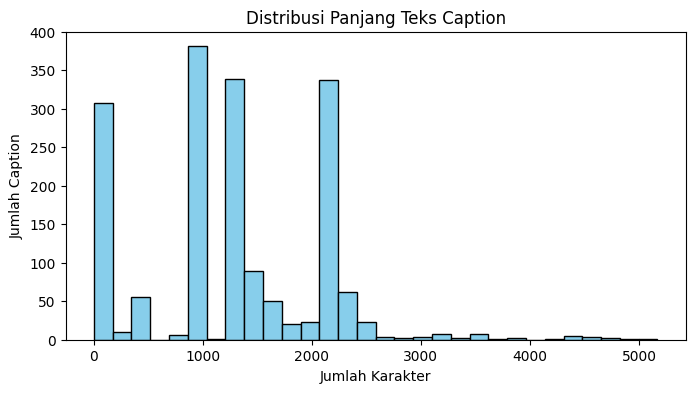

In [64]:
import matplotlib.pyplot as plt # Import matplotlib

text_col = df.columns[0]  # otomatis mengambil kolom pertama jika hanya ada 1 kolom
df['text_length'] = df[text_col].astype(str).apply(len)

plt.figure(figsize=(8,4))
plt.hist(df['text_length'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribusi Panjang Teks Caption')
plt.xlabel('Jumlah Karakter')
plt.ylabel('Jumlah Caption')
plt.show()

In [65]:
# 7. Tampilkan baris yang memiliki missing values
print("\n✅ BARIS DENGAN MISSING VALUES:")
print(df[df.isnull().any(axis=1)])


✅ BARIS DENGAN MISSING VALUES:
Empty DataFrame
Columns: [caption, clean_caption, label, text_length]
Index: []


Clean final

In [67]:
# Menghapus duplikasi dan reset index
df_clean = df.drop_duplicates().reset_index(drop=True)

# Mengecek ukuran dataset setelah cleaning
print(f"Ukuran dataset setelah menghapus duplikasi: {df_clean.shape}")

# Simpan dataset bersih jika diperlukan
df_clean.to_csv('scrapping_tiktok.csv', index=False)
print("✅ Dataset clean berhasil disimpan.")


Ukuran dataset setelah menghapus duplikasi: (1559, 4)
✅ Dataset clean berhasil disimpan.
